# Machine Learning - Absenteeism at Work 

In [ ]:
Start this process after you have done Data Exploration to have an understanding of your data

In [1]:
#Dependencies
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Step 1:  Load Data 

In [36]:
raw_data=pd.read_excel('Absenteeism_at_work.xls')
raw_data.shape

(740, 21)

# Step 2:  Clean Data

In [37]:
## In our data set if the below features has 0 as the value ,since it is  practically not  an acceptable value, we will replace it with NA
for i in ["Reason for absence","Month of absence","Day of the week","Seasons","Education","ID","Age","Weight","Height","Body mass index", "Absenteeism time in hours" ]:
        raw_data[i] = raw_data[i].replace(0,np.nan)

#Missing values
missing_data = pd.DataFrame(raw_data.isnull().sum())
missing_data = missing_data.rename(columns={0:"NA_sum"})
missing_data["NA_percent"] = (missing_data["NA_sum"]/len(raw_data))*100
missing_data


,NA_sum,NA_percent
ID,0,0.000000
Reason for absence,43,5.810811
Month of absence,3,0.405405
Day of the week,0,0.000000
Seasons,0,0.000000
Transportation expense,0,0.000000
Distance from Residence to Work,0,0.000000
Service time,0,0.000000
Age,0,0.000000
Work load Average/day,0,0.000000


In [38]:
clean_data=raw_data.dropna(how="any")

In [39]:
clean_data.shape

(696, 21)

Also, since we know that weight and height go into the calculation of BMI we will drop both of these features

In [40]:
modified_data=clean_data.drop(["Height", "Weight"], axis=1)
modified_data.shape

(696, 19)

In [41]:
for i in ["Absenteeism time in hours"]:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(modified_data[i], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extreme and lower extreme
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
print(f"minimum: {minimum}")
print(f"maximum: {maximum}")

minimum: -7.0
maximum: 17.0


In [42]:
# Replacing all the outliers value with maximum and 1 
modified_data.loc[modified_data[i] < minimum,i] = 1
modified_data.loc[modified_data[i] > maximum,i] = maximum

# Step 3:  Hot-encoding

In [43]:
day = modified_data.pop('Day of the week')
modified_data['Monday'] = (day == 1)*1.0
modified_data['Tuesday'] = (day == 2)*1.0
modified_data['Wednesday'] = (day == 3)*1.0
modified_data['Thursday'] = (day == 4)*1.0
modified_data['Friday'] = (day ==5)*1.0

In [44]:
#Change season to year
year = modified_data.pop('Seasons')
modified_data['2007'] = (year == 1)*1.0
modified_data['2008'] = (year == 2)*1.0
modified_data['2009'] = (year == 3)*1.0
modified_data['2010'] = (year == 4)*1.0

In [45]:
level = modified_data.pop('Education')
modified_data['Education1'] = (level == 1)*1.0
modified_data['Education2'] = (level == 2)*1.0
modified_data['Education3'] = (level == 3)*1.0
modified_data['Education4'] = (level == 4)*1.0

# Step 4:  Fit Data in to (X,y)

In [46]:
#Seperate into two seperate categories to change the datatype
categorical_set = ["Reason for absence","Month of absence","Monday","Tuesday", "Wednesday","Thursday", "Friday",
                   "2007", "2008", "2009", "2010","Disciplinary failure","Education1", "Education2", "Education3",
                   "Education4","Social drinker","Social smoker"]

numerical_set = ["ID","Transportation expense","Distance from Residence to Work","Service time","Age","Work load Average/day ",
                 "Hit target","Son","Pet","Body mass index","Absenteeism time in hours"]

## Converting categorical_set data into category types 
for i in categorical_set :
    modified_data[i] = modified_data[i].astype("category")

for i in numerical_set :
    modified_data[i] = modified_data[i].astype("float64")  

In [47]:
model_data=modified_data
model_data.head()

,ID,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,...,Thursday,Friday,2007,2008,2009,2010,Education1,Education2,Education3,Education4
0,11.0,26.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,7.0,7.0,7.0,279.0,5.0,14.0,39.0,239554.0,97.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,11.0,23.0,7.0,289.0,36.0,13.0,33.0,239554.0,97.0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,3.0,23.0,7.0,179.0,51.0,18.0,38.0,239554.0,97.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Now fit the data to test and train the model

In [48]:
X = model_data.drop("Absenteeism time in hours", axis=1)
y = model_data["Absenteeism time in hours"]
print(X.shape, y.shape)

(696, 28) (696,)


In [79]:
feature_names=list(X.columns)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Step 5: Normalize Data Using Standard Scaler (Optional)

In [ ]:
#from sklearn.preprocessing import StandardScaler

#X_scaler = StandardScaler().fit(X_train)

#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scalarX= MinMaxScaler().fit(X_train)

#X_train_scaled = scalarX.transform(X_train)
#X_test_scaled = scalarX.transform(X_test)

In [ ]:
#train_stats = X_train.describe()
#train_stats=train_stats.transpose()

In [ ]:
#def norm(i):
#  return (i - train_stats['mean']) / train_stats['std']

In [ ]:
#X_train_scaled= norm(X_train)
#X_test_scaled = norm(X_test)

# Step 6:  Linear Regression (Attribute Performance Model 1)

In [ ]:
This will give you an idea on how your attributes are performing

In [50]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [51]:
model1.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model1.predict(X_test)
y_predicted = np.round_(y_predicted,0)

In [52]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

Mean Squared Error (MSE): 14.028571428571428
R squared (R2 ): 0.2603730951836558


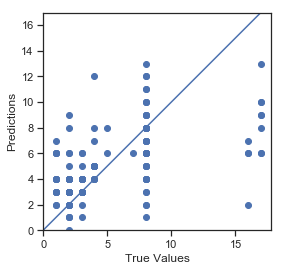

In [53]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
We can see that using all attributes is not providing effective results, so we will look at Decision Tree, RandomForest
and GridSearch to see what is the best features we can use

# Step 7: Feature Selection 

# Decision Tree Feature Selection 

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 

In [61]:
model2= DecisionTreeRegressor(criterion="mse", max_depth=5,
                                random_state=0).fit(X, y)

In [89]:
importances=model2.feature_importances_
importances=pd.DataFrame(importances)
importances["feature_name"]=feature_names
importances

,0,feature_name
0,0.024976,ID
1,0.614273,Reason for absence
2,0.000000,Month of absence
3,0.063474,Transportation expense
4,0.068997,Distance from Residence to Work
5,0.000000,Service time
6,0.022094,Age
7,0.020386,Work load Average/day
8,0.026680,Hit target
9,0.000000,Disciplinary failure


# RandomForest Feature Selection 

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Step 8:  Run Models With Modified Data

# Linear Regression - Model 1

# DecisionTree - Model 2

In [ ]:
model2.fit(X_train, y_train)

# Use our model to predict a value
y_predicted = model2.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Random Forest Model 3 (n_estimators=100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model3= RandomForestClassifier(n_estimators=100)

In [ ]:
model3.fit(X_train, y_train)


# Use our model to predict a value
y_predicted = model3.predict(X_test)

# Score the prediction with mse and r2
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

In [ ]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# Deep Learning Models Using Keras Model 4

In [ ]:
# define and fit the final model
model4 = Sequential()

In [ ]:
model4.add(Dense(20, input_dim=20, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(Dense(1, activation='linear'))

In [ ]:
model4.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.fit(X_train, y_train, epochs=1000, verbose=0)

In [ ]:
# Score the prediction with mse and r2
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
y_predicted = model4.predict(X_test)
y_predicted = np.round_(y_predicted,0)

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

loss, mae, mse = model4.evaluate(X_test, y_test, verbose=0)

print("Mean Absulte Error: {:5.2f}".format(mae))
print(f"Mean Squared Error (MSE): {mse}")
print(f"R squared (R2 ): {r2}")

In [ ]:
#Plot true values to predictions
plt.scatter(y_test, y_predicted)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])